In [ ]:
# direct downloadable link - just replcae 0 with 1
!wget -O dropbox_folder.zip "https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AABFoMwAxqEQWQnl_xQYY2fsa?dl=1"

--2025-03-13 19:07:26--  https://www.dropbox.com/sh/q4dehgdtbo0b6vt/AABFoMwAxqEQWQnl_xQYY2fsa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/bzncnlk9ufjde4t7w0q4k/AHQ8GDVQ5ANUg7oNBfvgcdE?rlkey=cdg8cc8hdfsazsj6rmvpqwrd1&dl=1 [following]
--2025-03-13 19:07:26--  https://www.dropbox.com/scl/fo/bzncnlk9ufjde4t7w0q4k/AHQ8GDVQ5ANUg7oNBfvgcdE?rlkey=cdg8cc8hdfsazsj6rmvpqwrd1&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b9c90a562aabf6d9fba317ab1.dl.dropboxusercontent.com/zip_download_get/CJMsazYuSNri89buiwaC8axay1ZpdYXYO4FmPZYCiehsGzEm9bnOuXxM8OBmJjmEIsf1xL0uYvsvyJIEzWEKPXh076dOvlei2W8Neo3e3JkyQg# [following]
--2025-03-13 19:07:31--  https://uc7b9c90a562aabf6d9fba317ab1.dl.dropboxusercontent.com/zip_

In [ ]:
!unzip -q /kaggle/working/dropbox_folder.zip

mapname:  conversion of  failed


In [ ]:
import os
os.listdir('/kaggle/working/Flickr8k_text')

['Flickr8k.token.txt',
 'Flickr_8k.testImages.txt',
 'Flickr_8k.devImages.txt',
 'readme.txt',
 'CrowdFlowerAnnotations.txt',
 'ExpertAnnotations.txt',
 'Flickr_8k.trainImages.txt',
 'Flickr8k.lemma.token.txt']

In [ ]:
len(os.listdir('/kaggle/working/Flicker8k_Dataset'))

8091

In [ ]:
# Glove
!wget -q --show-progress http://nlp.stanford.edu/data/glove.42B.300d.zip

glove.42B.300d.zip  100%[===================>]   1.75G  4.45MB/s    in 6m 15s  


In [ ]:
!unzip -q /kaggle/working/glove.42B.300d.zip

# Import necessary libraries and Read the files

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add, Dropout,\
Activation,Flatten, BatchNormalization, RepeatVector, TimeDistributed,Reshape,concatenate

from tensorflow.keras.models import Model, load_model
import tensorflow.keras.preprocessing.image as tf_image
import tensorflow.keras.applications.inception_v3 as inception

import string
from string import punctuation
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import re
from tqdm import tqdm

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
token = pd.read_csv('/kaggle/working/Flickr8k_text/Flickr8k.token.txt',delimiter='\t', header=None, names=['img','caption'])
token.head()

img  \
0  1000268201_693b08cb0e.jpg#0   
1  1000268201_693b08cb0e.jpg#1   
2  1000268201_693b08cb0e.jpg#2   
3  1000268201_693b08cb0e.jpg#3   
4  1000268201_693b08cb0e.jpg#4   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

In [ ]:
token.shape

(40460, 2)

In [ ]:
token['img_id'] = token['img'].apply(lambda x: x.split('.')[0])
token.head(2)

img  \
0  1000268201_693b08cb0e.jpg#0   
1  1000268201_693b08cb0e.jpg#1   

                                             caption                 img_id  
0  A child in a pink dress is climbing up a set o...  1000268201_693b08cb0e  
1              A girl going into a wooden building .  1000268201_693b08cb0e

In [ ]:
token['img'] = token['img'].apply(lambda x: x.split('#')[0])
token['img'].head(2)

0    1000268201_693b08cb0e.jpg
1    1000268201_693b08cb0e.jpg
Name: img, dtype: object

In [ ]:
train_df = pd.read_csv('/kaggle/working/Flickr8k_text/Flickr_8k.trainImages.txt', header=None, names=['img'])
train_df.head(3)

img
0  2513260012_03d33305cf.jpg
1  2903617548_d3e38d7f88.jpg
2  3338291921_fe7ae0c8f8.jpg

In [ ]:
train_df.shape

(6000, 1)

In [ ]:
(train_df['img'].isin(token['img'])).sum()

6000

In [ ]:
test_df = pd.read_csv('/kaggle/working/Flickr8k_text/Flickr_8k.testImages.txt', header=None, names=['img'])
test_df.head(3)

img
0  3385593926_d3e9c21170.jpg
1  2677656448_6b7e7702af.jpg
2   311146855_0b65fdb169.jpg

In [ ]:
test_df.shape

(1000, 1)

In [ ]:
(test_df['img'].isin(token['img'])).sum()

1000

In [ ]:
val_df = pd.read_csv('/kaggle/working/Flickr8k_text/Flickr_8k.devImages.txt', header=None, names=['img'])
val_df.head(3)

img
0  2090545563_a4e66ec76b.jpg
1  3393035454_2d2370ffd4.jpg
2  3695064885_a6922f06b2.jpg

In [ ]:
val_df.shape

(1000, 1)

In [ ]:
(val_df['img'].isin(token['img'])).sum()

1000

Initialize pre-trained model InceptionV3  for feature extraction by removing the classification layer, setting various constants for image dimensions, output dimensions, start and stop tokens for captions, the number of training epochs, and the preprocessing function for input images.

In [ ]:
encode_model = InceptionV3(weights='imagenet')
encode_model = Model(encode_model.input, encode_model.layers[-2].output)
# we r not interested in classification we want the 2nd last layer
WIDTH = 299
HEIGHT = 299
OUTPUT_DIM = 2048
START = "startseq"  # start tag
STOP = "endseq"     # end tag to differentiate the usual caption
EPOCHS = 10
preprocess_input = inception.preprocess_input

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
token['caption'][0:2]

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
Name: caption, dtype: object

In [ ]:
token['caption'] = token['caption'].apply(lambda x: START+' '+x+' '+STOP)
token['caption'][1]

'startseq A girl going into a wooden building . endseq'

In [ ]:
token['caption'][450]

'startseq People are riding around on snowmobiles . endseq'

In [ ]:
check_files = os.listdir('/kaggle/working/Flicker8k_Dataset')

In [ ]:
token['img'].isin(check_files).sum()

40455

In [ ]:
token.shape

(40460, 3)

In [ ]:
(token['img_id']=='1000268201_693b08cb0e').sum()

5

In [ ]:
(token['img_id']=='2717686269_80c4b5ac9e').sum()

5

# Cleaning and tokenizing the captions, making use of NLTK library
By cleaning the captions, the code ensures that the text is in a consistent format, which improves the quality of the input data for training the model.

In [ ]:
token['caption'] = token['caption'].apply(lambda x: re.sub('['+punctuation+']',' ',x))
token['caption'] = token['caption'].apply(lambda x: re.sub("\d"," ", x))
token['caption'] = token['caption'].replace('-', ' ')
token['caption'] = token['caption'].apply(lambda x: re.sub("\s+"," ", x))
token['caption'] = token['caption'].str.lower()

Setting a threshold to remove rare words from the vocabulary. updating the word_counts dictionary by incrementing the count of each word. Creating a list of words (vocab) that appear in the word_counts dictionary at least word_count_threshold times

In [ ]:
word_count_threshold = 5
word_counts ={}
for caption in token['caption']:
  for w in word_tokenize(caption):
    word_counts[w] = word_counts.get(w,0) + 1

In [ ]:
vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed word count %d ==> %d' % (len(word_counts), len(vocab)))

preprocessed word count 8442 ==> 2973


In [ ]:
token['caption'][0]

'startseq a child in a pink dress is climbing up a set of stairs in an entry way endseq'

Determining the maximum length of the captions, thus setting a consistent sequence length for all captions, which is necessary for training sequence models like RNNs or LSTMs.

In [ ]:
caption_lens=[]
for caption in token['caption']:
  words=word_tokenize(caption)
  words=[w for w in words if w in vocab]
  caption_lens.append(len(words))
max_length=max(caption_lens)

In [ ]:
print('maximum caption length is:',max_length)

maximum caption length is: 37


creating dictionaries for word to id - for one hot representation and id to word mapping- predictions will be id so need to convert them to words. Getting size of the vocabulary (vocab_size) is for defining the output layer of the model and for other preprocessing steps

In [ ]:

idxtoword = {}
wordtoidx = {}

ix = 1
for w in vocab:
    wordtoidx[w] = ix
    idxtoword[ix] = w
    ix += 1

vocab_size = len(idxtoword) + 1
vocab_size

2974


Creating an empty dictionary embeddings_index to store the word embeddings. Using the GloVe (Global Vectors for Word Representation) a Pretrained Word Embeddings

# Setting Embedding Dimension, Initializing Embedding Matrix

The matrix will be used to store the embedding vectors for each word in the vocabulary.Populating the embedding matrix with the pre-trained GloVe embeddings allows the model to leverage these embeddings during training

In [ ]:
embeddings_index = {}
f = open( '/kaggle/working/glove.42B.300d.txt', encoding="utf-8")

for line in f:
    line=line.strip()
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print(f'Found {len(embeddings_index)} word vectors.')

Found 1917494 word vectors.


In [ ]:
embedding_dim = 300 # each word with dense vector of size 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(2974, 300)

Merging train data, test data and val data with the token data since all the train, test and val's info are there in the token data. i.e to get all imgs associated with each file and store them separately (create a separate directory for them).

In [ ]:

# Merge token dataframe with train dataframe
train_cap_df = pd.merge(token, train_df, on='img', how='inner')

# Merge token dataframe with validation dataframe
val_cap_df = pd.merge(token, val_df, on='img', how='inner')

# Merge token dataframe with test dataframe
test_cap_df = pd.merge(token, test_df, on='img', how='inner')

In [ ]:
train_cap_df.sample(3)

img  \
25259  3677613006_4689cb8e4e.jpg   
22949  3551787566_b5ebbe2440.jpg   
19753  3374722123_6fe6fef449.jpg   

                                                 caption  \
25259  startseq the girl is wearing headphones and ho...   
22949  startseq woman in blue workout attire and helm...   
19753  startseq a woman in a pink striped shirt with ...   

                      img_id  
25259  3677613006_4689cb8e4e  
22949  3551787566_b5ebbe2440  
19753  3374722123_6fe6fef449

# Transfering all the images from the main directory to their respective directories
for easy accessing, having organized way to work with and doing required preprocessing steps - encoding images, data generator process, generating captions .

In [ ]:
import shutil
# Paths to the directories (use your actual directory paths)
train_dir = '/kaggle/working/Flicker8k_Dataset/train'
val_dir = '/kaggle/working/Flicker8k_Dataset/val'
test_dir = '/kaggle/working/Flicker8k_Dataset/test'
source_dir = '/kaggle/working/Flicker8k_Dataset/'

# Create directories if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Move images into the corresponding directories
for i, row in train_df.iterrows():
    img_name = row['img']
    img_path = os.path.join(source_dir, img_name)
    if os.path.exists(img_path):
        shutil.move(img_path, os.path.join(train_dir, img_name))

for i, row in val_df.iterrows():
    img_name = row['img']
    img_path = os.path.join(source_dir, img_name)
    if os.path.exists(img_path):
        shutil.move(img_path, os.path.join(val_dir, img_name))

for i, row in test_df.iterrows():
    img_name = row['img']
    img_path = os.path.join(source_dir, img_name)
    if os.path.exists(img_path):
        shutil.move(img_path, os.path.join(test_dir, img_name))

In [ ]:
import os

# List all files in the source directory
for file_name in os.listdir(source_dir):
    file_path = os.path.join(source_dir, file_name)

    # Check if the file exists in any of the target directories
    if not (os.path.exists(os.path.join(train_dir, file_name)) or
            os.path.exists(os.path.join(val_dir, file_name)) or
            os.path.exists(os.path.join(test_dir, file_name))):

        # If the file doesn't exist in any target directory, remove it
        if os.path.isfile(file_path):
            os.remove(file_path)


Encoding images, preprocessing using the preprocess_input function specific to InceptionV3, Resizing the Image to generate a 2048-dimensional encoding vector representing the features of the image. i.e receives an image and outputs 2048 size vector so that it can be used as an input.

In [ ]:
from tensorflow.keras.preprocessing import image
# Function to encode a single image
def encodeImage(img):
    try:
        img = img.resize((WIDTH, HEIGHT))  # Resize image to InceptionV3 input size
        x = image.img_to_array(img)  # Convert to array
        x = np.expand_dims(x, axis=0)  # Add extra dimension (batch size 1)
        x = preprocess_input(x)  # Preprocess the image

        features = encode_model.predict(x)  # Get features from the model
        return np.reshape(features, OUTPUT_DIM)  # Reshape to match OUTPUT_DIM (2048)
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Encoding images storing them in a dictionary of train, val and test
Working on a system to encode images using the InceptionV3 model and processing them in parallel. using functions to encode batches of images, processing them using a ThreadPoolExecutor for parallel execution, and saving/loading the encoded images using pickle. logging to handle errors and provide information on the process.

In [ ]:
import os
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from concurrent.futures import ThreadPoolExecutor
import logging


# Set up logging
logging.basicConfig(level=logging.INFO)


# Function to encode images in a batch
def encode_batch(batch_images, directory):
    encoded_batch = {}
    for i, img_name in batch_images:
        try:
            img_path = os.path.join(directory, img_name)  # Get the image path
            img = image.load_img(img_path)  # Load the image
            encoded_features = encodeImage(img)  # Get encoded features
            encoded_batch[img_name] = encoded_features  # Add to the batch
        except Exception as e:
            logging.error(f"Error processing image {img_name}: {e}")
            continue  # Skip this image if an error occurs
    return encoded_batch

# Function to process images in parallel using ThreadPoolExecutor
def process_images_parallel(data, batch_size=20, directory=source_dir):
    encoded_images = {}
    image_names = [(i, data['img'][i]) for i in range(data.shape[0])]
    batches = [image_names[i:i + batch_size] for i in range(0, len(image_names), batch_size)]

    # Use ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(encode_batch, batch, directory): i for i, batch in enumerate(batches)}

        for future in futures:
            batch_result = future.result()  # Get the result of the completed batch
            encoded_images.update(batch_result)  # Update the overall result with the batch

    return encoded_images

# Function to save encoded images using pickle
def save_encoded_images(encoded_images, filepath):
    with open(filepath, 'wb') as file:
        pickle.dump(encoded_images, file)

# Function to load encoded images from a pickle file
def load_encoded_images(filepath):
    with open(filepath, 'rb') as file:
        return pickle.load(file)

# Example usage with DataFrame (Assuming DataFrame has a 'image_name' column)
train_data = train_cap_df
val_data = val_cap_df
test_data = test_cap_df


In [ ]:

# Assuming train_encoded_images is created as follows
train_encoded_images = process_images_parallel(train_data, batch_size=50, directory=train_dir)

In [ ]:
file_path= '/kaggle/working/output/train_encoded_images.pkl'

import os
import pickle

def save_encoded_images(encoded_images, filepath):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(filepath), exist_ok=True)

    # Save the encoded images using pickle
    with open(filepath, 'wb') as file:
        pickle.dump(encoded_images, file)

# Example usage
#train_encoded_images = {}  # Replace with your actual encoded images dictionary
save_encoded_images(train_encoded_images, '/kaggle/working/output/train_encoded_images.pkl')


In [ ]:
save_encoded_images(train_encoded_images, '/kaggle/working/output/train_encoded_images.pkl')

In [ ]:
# Path where the file is uploaded
load_path = '/kaggle/input/train-encoded-pickle/train_encoded_images.pkl'

# Load the encoded images using pickle.load
with open(load_path, 'rb') as f:
    train_encoded_images = pickle.load(f)

print('Encoded images loaded successfully')

Encoded images loaded successfully


In [ ]:
len(train_encoded_images)

6000

In [ ]:
# Assuming val_encoded_images is created as follows
val_encoded_images = process_images_parallel(val_data, batch_size=50, directory=val_dir)

In [ ]:
save_encoded_images(val_encoded_images, '/content/val_encoded_images.pkl')

In [ ]:

# Path where the file is uploaded
load_path = '/kaggle/input/validation-encoded-images/val_encoded_images.pkl'

# Load the encoded images using pickle.load
with open(load_path, 'rb') as f:
    val_encoded_images = pickle.load(f)

print('Encoded images loaded successfully')

Encoded images loaded successfully


In [ ]:
len(val_encoded_images)

1000

In [ ]:
# Assuming train_encoded_images is created as follows
test_encoded_images = process_images_parallel(test_data, batch_size=50, directory=test_dir)

In [ ]:
save_encoded_images(test_encoded_images, '/content/test_encoded_images.pkl')

In [ ]:

# Path where the file is uploaded
load_path = '/kaggle/input/test-encoded-images/test_encoded_images.pkl'

# Load the encoded images using pickle.load
with open(load_path, 'rb') as f:
    test_encoded_images = pickle.load(f)

print('Encoded images loaded successfully')

Encoded images loaded successfully


In [ ]:
len(test_encoded_images)

1000

# Data Generator function for training Neural Network
data generator to feed input to the model in the form of batches rather than providing all data at once. This is particularly useful for large datasets, where loading all data into memory at once is not feasible. The generator allows the model to train on smaller, manageable chunks of data.

In [ ]:
def data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch):
  # x1 - Training data for photos
  # x2 - The caption that goes with each photo
  # y - The predicted rest of the caption
  x1, x2, y = [], [], []
  n=0
  while True:
    for k,caption in enumerate(data['caption']):
      n+=1
      photo = encoded_images[data['img'][k]]

      seq = [wordtoidx[word] for word in word_tokenize(caption) if word in wordtoidx]
        # Generate a training case for every possible sequence and outcome
      for i in range(1, len(seq)):
        in_seq, out_seq = seq[:i], seq[i]
        in_seq = pad_sequences([in_seq], maxlen=max_length,padding='post')[0]
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        x1.append(photo)
        x2.append(in_seq)
        y.append(out_seq)
      if n==num_photos_per_batch:
        yield ((np.array(x1), np.array(x2)), np.array(y))
        # next when generator gets called iteration will start from where we left off
        # this makes it make a pass through the complete data in an epoch
        x1, x2, y = [], [], []
        n=0

In [ ]:
from tensorflow.keras.layers import Input,LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization,add

# Building the model architecture
In model building we work on 2 types of input. 1st i/p is of the images and 2nd input is of sequence.

By combining image and caption features and processing them through dense and LSTM layers, the model is designed to generate contextually relevant captions for images.

In [ ]:
# Define Image Feature Input:
inputs1 = Input(shape=(OUTPUT_DIM,))
fe1 = Dropout(0.3)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))   # Define Caption Input: This defines an input layer for the caption with a shape of
#max_length (the length of the longest caption).

# Caption Processing:
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256, return_sequences=True)(se2)
se4 = LSTM(256)(se3)

# Combine Image and Caption Features:
# This adds the processed image features (fe2) and the processed caption features (se4) together to create a combined feature representation.
decoder1 = add([fe2, se4])   # this input should be same means if fe2 is 256 than se4 should also be 256

# Decoder Processing: applies a dense layer with 256 units and ReLU activation to the combined features.
decoder2 = Dense(256, activation='relu')(decoder1)

# outputs applies a dense layer with vocab_size units and softmax activation to produce a probability distribution over the vocabulary
# for the next word prediction.
outputs = Dense(vocab_size, activation='softmax')(decoder2)

caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)
# This creates the final model, caption_model, with the specified inputs (image features and caption input)
# and outputs (predicted next word in the caption).

In [ ]:
for i, layer in enumerate(caption_model.layers):
    print(i, layer.name)
# identufying the embedding layer by listing all layers in the model

0 input_layer_4
1 embedding_1
2 input_layer_3
3 dropout_3
4 dropout_2
5 lstm_2
6 dense_1
7 lstm_3
8 add_1
9 dense_2
10 dense_3


In [ ]:
caption_model.layers[1].set_weights([embedding_matrix])
caption_model.layers[1].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
EPOCHS = 30
caption_model.optimizer.lr = 1e-4
number_pics_per_batch = 6
steps = len(train_data['caption'])//number_pics_per_batch

for i in tqdm(range(EPOCHS)):
    generator = data_generator(train_data, train_encoded_images, wordtoidx, max_length, number_pics_per_batch)
    caption_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  0%|          | 0/30 [00:00<?, ?it/s]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 50s 9ms/step - loss: 4.2620


  3%|▎         | 1/30 [00:50<24:24, 50.51s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 3.1772


  7%|▋         | 2/30 [01:34<21:47, 46.70s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.9162


 10%|█         | 3/30 [02:18<20:25, 45.38s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.7753


 13%|█▎        | 4/30 [03:02<19:22, 44.73s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.6746


 17%|█▋        | 5/30 [03:45<18:30, 44.42s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.6085


 20%|██        | 6/30 [04:30<17:44, 44.35s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.5560


 23%|██▎       | 7/30 [05:14<16:57, 44.23s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.5113


 27%|██▋       | 8/30 [05:58<16:13, 44.25s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.4746


 30%|███       | 9/30 [06:42<15:27, 44.17s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.4399


 33%|███▎      | 10/30 [07:26<14:41, 44.09s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.4136


 37%|███▋      | 11/30 [08:10<13:58, 44.13s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.3919


 40%|████      | 12/30 [08:54<13:13, 44.07s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.3694


 43%|████▎     | 13/30 [09:38<12:29, 44.10s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.3490


 47%|████▋     | 14/30 [10:22<11:44, 44.05s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.3367


 50%|█████     | 15/30 [11:06<10:59, 43.97s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.3140


 53%|█████▎    | 16/30 [11:50<10:15, 43.97s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2950


 57%|█████▋    | 17/30 [12:34<09:30, 43.89s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2869


 60%|██████    | 18/30 [13:17<08:46, 43.84s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2737


 63%|██████▎   | 19/30 [14:01<08:03, 43.92s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2634


 67%|██████▋   | 20/30 [14:45<07:19, 43.90s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2496


 70%|███████   | 21/30 [15:29<06:34, 43.89s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2438


 73%|███████▎  | 22/30 [16:13<05:50, 43.86s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2321


 77%|███████▋  | 23/30 [16:57<05:06, 43.80s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2213


 80%|████████  | 24/30 [17:40<04:22, 43.82s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2142


 83%|████████▎ | 25/30 [18:24<03:38, 43.79s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.2025


 87%|████████▋ | 26/30 [19:08<02:55, 43.84s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.1930


 90%|█████████ | 27/30 [19:52<02:11, 43.89s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.1892


 93%|█████████▎| 28/30 [20:36<01:27, 43.81s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.1836


 97%|█████████▋| 29/30 [21:20<00:43, 43.80s/it]

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 2.1793


100%|██████████| 30/30 [22:03<00:00, 44.12s/it]


# Generating and Finalizing the captions

In [ ]:
def generateCaption(photo):
    in_text = START
    for i in range(max_length):
        sequence = [wordtoidx[w] for w in in_text.split() if w in wordtoidx]
        sequence = pad_sequences([sequence], maxlen=max_length,padding='post')
        yhat = caption_model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idxtoword[yhat]
        in_text += ' ' + word
        if word == STOP:
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

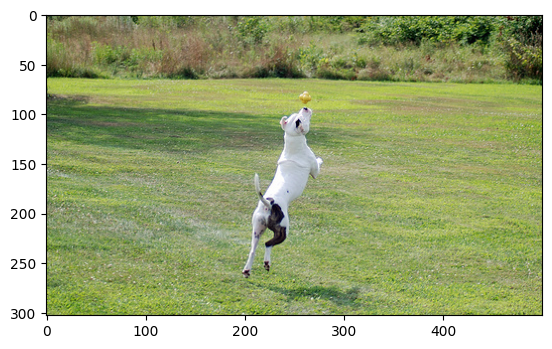

Caption: a dog is running through a grassy field


In [ ]:
from PIL import Image

# Load image filename from train_data
index = 75
image_file = train_data.iloc[index, 0]  # Get image filename, like '1000268201_693b08cb0e.jpg'

# Construct the full file path to the image (for visualization)
image_path = '/kaggle/working/Flicker8k_Dataset/train/' + image_file

# Retrieve the precomputed image features from your dictionary (train_encoded_images)
image_features = train_encoded_images.get(image_file)  # This should be a 2048-dimensional vector

# Check if the image features exist in the dictionary
if image_features is None:
    print(f"Error: Image features for '{image_file}' not found in train_encoded_images.")
else:
    # Load and display the image for visualization
    x = plt.imread(image_path)
    plt.imshow(x)
    plt.show()

    # Reshape the image features to match the model input (in case it's not already in the correct shape)
    image_features = image_features.reshape((1, 2048))  # Ensure it's a 1D vector with shape (1, 2048)

    # Generate the caption using the precomputed features
    print("Caption:", generateCaption(image_features))


# Evaluating model performance on validation data

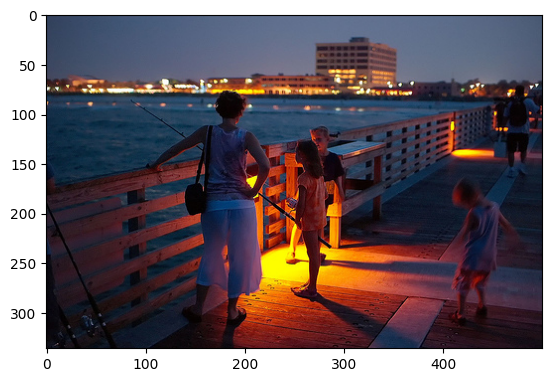

Caption: a man in a red shirt is standing on a dock by a lake


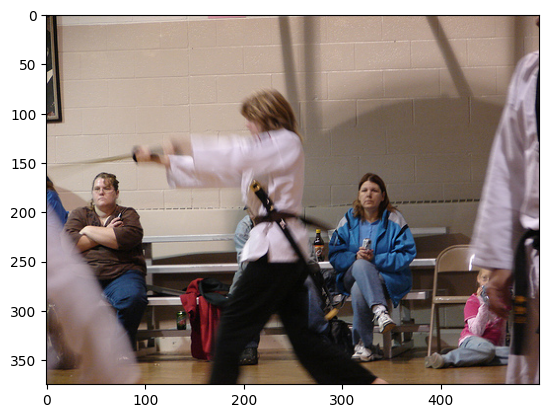

Caption: a group of people are walking in a parade


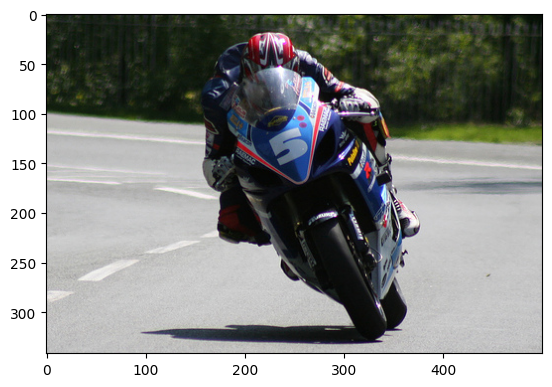

Caption: a man rides a motorcycle


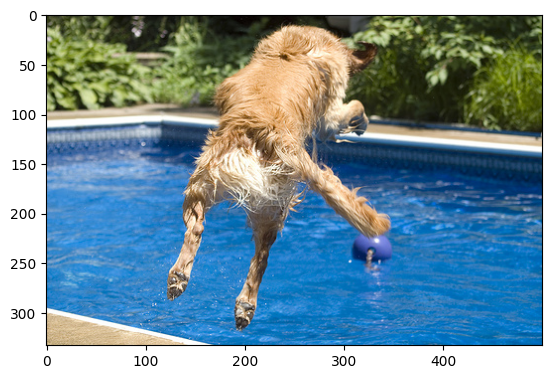

Caption: a brown dog is running through the water


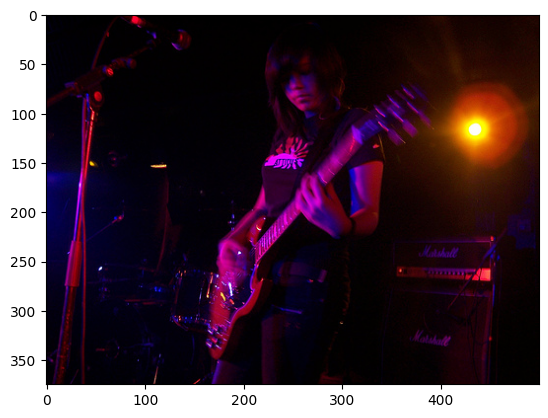

Caption: a man in a batman costume is sitting on a sofa


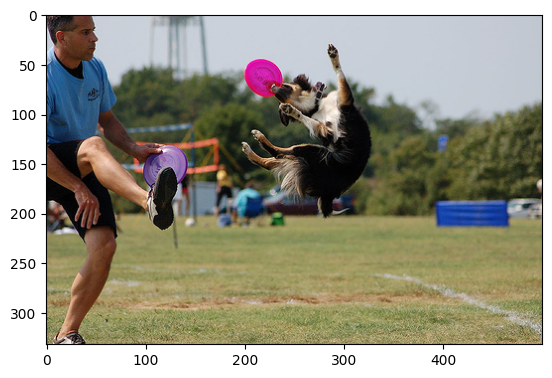

Caption: a man in a red shirt is playing soccer


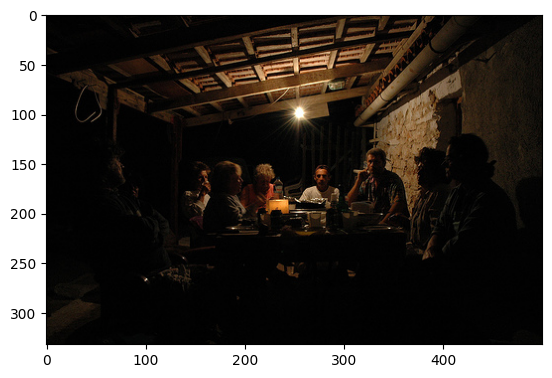

Caption: a man in a black shirt is standing in front of a crowd


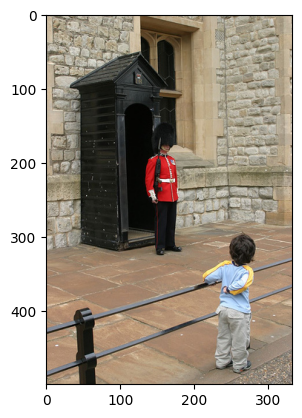

Caption: a man in a red shirt is standing on a sidewalk


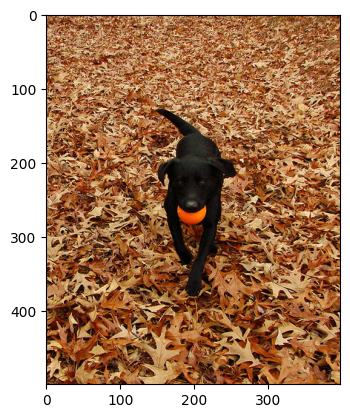

Caption: a black and white dog is running through a grassy area


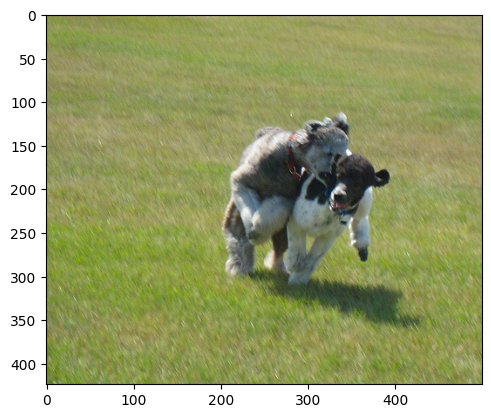

Caption: a dog is running through a grassy field


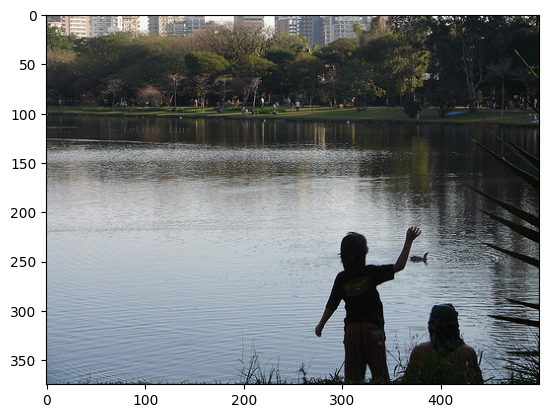

Caption: a man in a red shirt is standing on a dock by the water


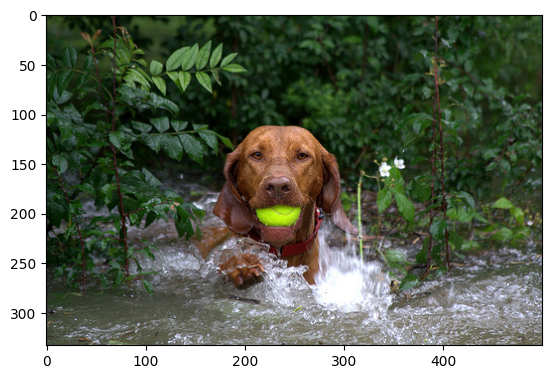

Caption: a brown dog is running through the water


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# List of indices
indices = [57, 451, 369, 99, 342, 257,33, 777,634,89, 1,70]

# Loop over each index
for index in indices:
    # Load image filename from val_data
    image_file = val_data.iloc[index, 0]  # Get image filename

    # Construct the full file path to the image (for visualization)
    image_path = '/kaggle/working/Flicker8k_Dataset/val/' + image_file

    # Retrieve the precomputed image features from your dictionary (val_encoded_images)
    image_features = val_encoded_images.get(image_file)  # This should be a 2048-dimensional vector

    # Check if the image features exist in the dictionary
    if image_features is None:
        print(f"Error: Image features for '{image_file}' not found in val_encoded_images.")
    else:
        # Load and display the image for visualization
        x = plt.imread(image_path)
        plt.imshow(x)
        plt.show()

        # Reshape the image features to match the model input (in case it's not already in the correct shape)
        image_features = image_features.reshape((1, 2048))  # Ensure it's a 1D vector with shape (1, 2048)

        # Generate the caption using the precomputed features
        print("Caption:", generateCaption(image_features))


# Creating a test data generator
This process helps in evaluating the performance of image captioning model on the validation dataset by visualizing the image and the generated caption.

In [ ]:
def test_data_generator(data, encoded_images, wordtoidx, max_length):
    x1, x2, y = [], [], []
    while True:
        for k, caption in enumerate(data['caption']):
            photo = encoded_images[data['id'][k]]

            # Tokenize caption and create sequence
            seq = [wordtoidx[word] for word in word_tokenize(caption) if word in wordtoidx]

            # Generate in_seq, out_seq for the caption sequence
            for i in range(1, len(seq)):
                in_seq, out_seq = seq[:i], seq[i]
                in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                # Collect the current batch of data
                x1.append(photo)
                x2.append(in_seq)
                y.append(out_seq)

            # Yield data for evaluation
            yield (np.array(x1), np.array(x2)), np.array(y)

# Generate the caption for the the test set

In [ ]:
def generate_caption_for_image(image_features, model, wordtoidx, idxtoword, max_length):
    # Assuming `image_features` is reshaped to (1, 2048)
    in_seq = np.zeros((1, max_length))  # Initialize the input sequence array
    in_seq[0, 0] = wordtoidx['startseq']  # Assuming 'startseq' is used to begin sequences

    # Generate caption one word at a time
    caption = []
    for i in range(1, max_length):
        # Predict the next word
        pred = model.predict([image_features, in_seq], verbose=0)
        pred_word_idx = np.argmax(pred)
        pred_word = idxtoword[pred_word_idx]

        if pred_word == 'endseq':  # If end sequence is generated, stop
            break

        caption.append(pred_word)
        in_seq[0, i] = pred_word_idx  # Add predicted word to the sequence for the next iteration

    return ' '.join(caption)


In [ ]:
test_image_dir = '/kaggle/working/Flicker8k_Dataset/test'
model = caption_model

# Iterate through test data (test_image_dir) to generate captions for each image
test_results = []
for image_file in tqdm(os.listdir(test_image_dir)):
    if image_file.endswith('.jpg') or image_file.endswith('.jpeg'):  # Assuming .jpg or .jpeg images
        image_features = test_encoded_images.get(image_file)
        if image_features is None:
            print(f"Error: Features not found for {image_file}")
            continue

        image_features = image_features.reshape((1, 2048))  # Reshape image feature
        caption = generate_caption_for_image(image_features, model, wordtoidx, idxtoword, max_length)

        if caption is not None:
            test_results.append({'image_id': image_file, 'caption': caption})

# Create a DataFrame to store the results
test_df = pd.DataFrame(test_results)

# Show the first few rows of the DataFrame
test_df.head(10)

100%|██████████| 1000/1000 [12:04<00:00,  1.38it/s]


image_id  \
0  3228069008_edb2961fc4.jpg   
1  2225231022_1632d0a5aa.jpg   
2  3245070961_8977fdd548.jpg   
3  3484832904_08619300d9.jpg   
4  2542662402_d781dd7f7c.jpg   
5  1917265421_aeccf1ca38.jpg   
6  3225310099_d8e419ba56.jpg   
7  2075321027_c8fcbaf581.jpg   
8  2358561039_e215a8d6cd.jpg   
9  3696698390_989f1488e7.jpg   

                                             caption  
0                   a dog is running through a field  
1  a man in a black shirt and a blond woman in a ...  
2     a man in a red shirt is standing on a sidewalk  
3              a boy in a blue shirt hits a baseball  
4             a dog is running through a grassy area  
5     a man in a red shirt is standing on a sidewalk  
6                     a man is kayaking down a river  
7  a man in a blue shirt is standing on a fancy bike  
8         a man in a red shirt is standing on a dock  
9         a man is riding a bicycle on a rocky trail

In [ ]:
# Optionally, save the DataFrame to a CSV file
test_df.to_csv('Generated_Captions.csv', index=False)